# **Hakan Alif P**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml

# Muat dataset MNIST
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

print(mnist.DESCR)

c:\Users\Alif\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

## **1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!**

In [3]:
mnist_df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
mnist_df['target'] = mnist.target.astype(int)  # Menambahkan kolom target sebagai label

X = mnist.data
y = mnist.target.astype(int)

In [4]:
# Hitung jumlah sampel dalam kelas mayoritas dan kelas minoritas
class_counts = np.bincount(y)
majority_class_count = np.max(class_counts)
minority_class_count = np.min(class_counts)

# Hitung rasio kelas
class_ratio = majority_class_count / minority_class_count

print(f"Rasio Kelas: {class_ratio:.2f}")

Rasio Kelas: 1.25


1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: target, dtype: int64


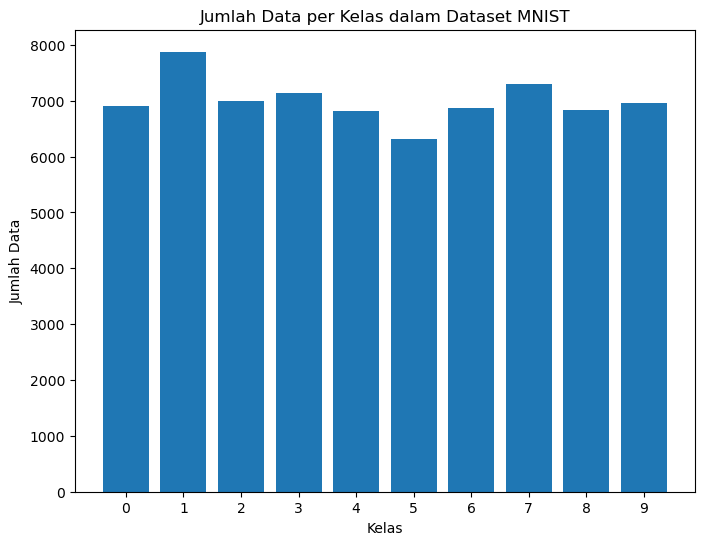

In [5]:
class_counts = mnist_df['target'].value_counts()

print(class_counts)

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Kelas dalam Dataset MNIST')
plt.xticks(class_counts.index)
plt.show()

Tidak seimbang, dikarenakan tidak ada yang sama persis.